# Bài tập Naive Bayes

## Sử dụng GaussianNB để phân nhóm cho tập Iris dataset
- dataset: 'Iris.csv'


In [68]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings

In [69]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
# remove id column
df = df.drop(['Id'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='Species'>

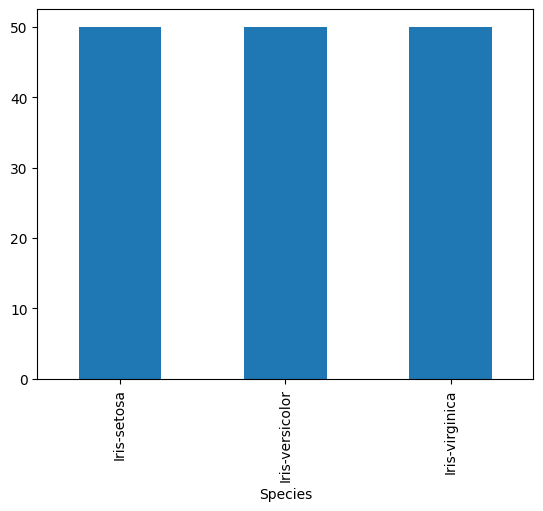

In [71]:
# visualizing the data
df.loc[:,'Species'].value_counts().plot(kind='bar')

In [72]:
count_class = df.value_counts(df['Species'], sort=True)
count_class

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Text(0, 0.5, '')

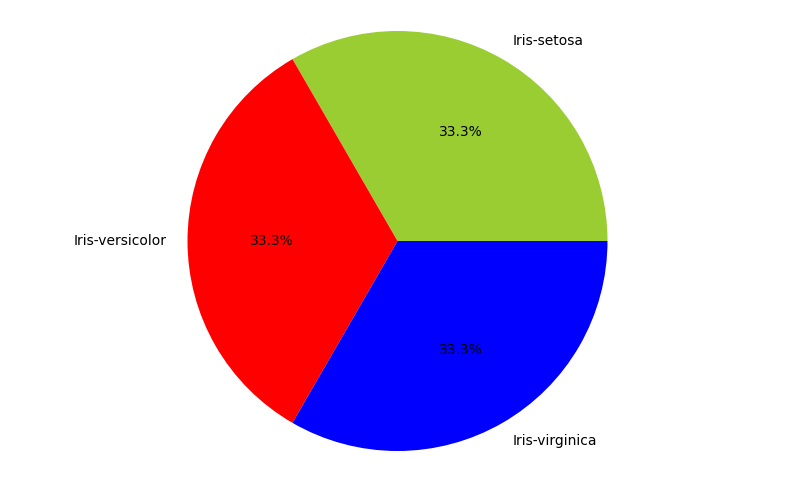

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.pie(df['Species'].value_counts(),autopct='%1.1f%%', labels=['Iris-setosa','Iris-versicolor','Iris-virginica'], colors=['yellowgreen','r','b'])
plt.axis('equal')
plt.ylabel('')

In [74]:
# prepare train and test data
print(df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [75]:
from sklearn.model_selection import train_test_split
y = df['Species'].values 
X = df.drop(['Species'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
print(X_train[5])
print(X_test[5])

[6.3 2.5 5.  1.9]
[5.4 3.4 1.5 0.4]


In [77]:
# Create GAUSSIAN BAYES MODEL
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf

GaussianNB()

In [78]:
# predict dataset
y_pred = clf.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [80]:
# evaluate the model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", score)

The accuracy of the model is:  1.0
